# Part-of-Speech tags correlations

Correlations of part-of-speech tags of words with word2bits vectors.

- PoS are all possible tags occurring with given word, as retrieved by Majka.
- Word vectors are binary vectors embedded independently.

We hope to see some attributes of word vectors to significantly correlate with some of the 36 tags' vectors. Therefore, we create a matrix of all correlations between PoS tags <> word vectors.

In [9]:
import pandas as pd
from nltk.corpus import wordnet as wn

vec_length = 600
epochs = 10

vecs_df = pd.read_csv("/var/tmp/vectors/1b%sd_vectors_e%s_sample1e4_nonbin" % (vec_length, epochs), 
                      skiprows=[0], header=None, sep=" ")
vecs_df = vecs_df.set_index(0)
vecs_df = vecs_df.drop(columns=[vecs_df.columns[-1]])
vecs_df = vecs_df.replace(vecs_df.values.max(), 1)
vecs_df = vecs_df.replace(vecs_df.values.min(), 0)
# retype to minimal range int to save space
vecs_df = vecs_df.astype('int8')
vecs_df.head(20)

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,,,,,,,,,,,,,,,,,,,,,
</s>,1,1,0,0,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
the,0,0,1,1,0,0,1,0,1,1,...,0,1,1,1,0,1,1,1,0,1
of,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,1
and,0,0,1,1,0,1,1,0,0,0,...,0,1,1,1,0,0,1,1,0,1
one,0,0,0,1,0,0,1,0,1,0,...,1,1,0,0,1,0,0,1,0,1
in,0,1,1,1,1,0,1,0,1,0,...,1,1,0,1,1,0,0,1,1,1
a,0,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,1,1
to,1,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,1,0,1,1,1
zero,0,0,0,1,0,0,0,0,1,1,...,1,0,0,1,1,0,0,1,0,0


In [11]:
import majka

morph = majka.Majka("../data/w-lt.en.fsa")
morph.flags |= majka.IGNORE_CASE  # ignore the word case whatsoever
morph.tags = True  # turn tag processing back on (default)

morph.find('go')

[{'lemma': 'go', 'tags': {'other': 'NN'}},
 {'lemma': 'go', 'tags': {'other': 'VB'}},
 {'lemma': 'go', 'tags': {'other': 'VBP'}}]

In [12]:
def tags_for_word(word):
     return set([lemma["tags"]["other"] for lemma in morph.find(str(word))])

In [13]:
tags_for_word("go")

{'NN', 'VB', 'VBP'}

In [14]:
word_tags = dict()
for word in vecs_df.index.values:
    word_tags[word] = tags_for_word(word)
    
all_tags = set.union(*word_tags.values())
all_tags

{'CC',
 'DT',
 'EX',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'MD+RB',
 'NN',
 'NNS',
 'PDT',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'TO',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB'}

In [15]:
for tag in all_tags:
    vecs_df[tag] = [1 if tag in tags_for_word(word) else 0 for word in vecs_df.index]

In [16]:
vecs_df.head()

,1,2,3,4,5,6,7,8,9,10,...,WRB,NNS,VBP,JJS,RBS,WDT,PRP$,WP$,VBN,PDT
0,,,,,,,,,,,,,,,,,,,,,
</s>,1,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
the,0,0,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
of,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
and,0,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
one,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_df = vecs_df.corr()[list(all_tags)].loc[range(vec_length)]
corr_df = corr_df.sort_index(axis=1)
plt.figure(figsize = (20, 20))
sns.heatmap(corr_df, annot=True)

In [24]:
corr_df.max(axis=0)

CC       0.033276
DT       0.045311
EX       0.009312
IN       0.064910
JJ       0.062463
JJR      0.016909
JJS      0.014953
MD       0.022607
MD+RB    0.009312
NN       0.089118
NNS      0.103597
PDT      0.020824
PRP      0.054372
PRP$     0.014536
RB       0.072221
RBR      0.020451
RBS      0.014865
RP       0.040067
TO       0.013170
VB       0.100885
VBD      0.072109
VBG      0.064305
VBN      0.070296
VBP      0.101707
VBZ      0.059589
WDT      0.020824
WP       0.026341
WP$      0.009312
WRB      0.015765
dtype: float64

## Reduced correlations - reduced by Top variance

Attributes from 600dim words2bits space obtained by PCA dimensionality reduction into target dimensionality 

In [106]:
def export_vecs_for_eval(vectors_df, fname="vecs_pca_600_to_200"):  
    with open("/var/tmp/vectors/reduced/%s" % fname, "w") as f:
        f.write("text\n")
        f.write("%s %s\n" % vectors_df.shape)
        for word in vectors_df.index.values: 
            try:
                f.write("%s %s\n" % (word, vectors_df.loc[word].astype(float).transpose() \
                    .to_csv(sep=" ", header=False, index=False)))
            except KeyError:
                print("%s not written to output vectors" % word)

In [ ]:
from sklearn.decomposition import PCA


vec_range = list(range(200, 0, -10))
print(vec_range)
corr_for_dims_df = pd.DataFrame()
for i, vec_dim_i in enumerate(vec_range):
    print(vec_dim_i)
    vecs_reduced = PCA(n_components=vec_dim_i).fit_transform(vecs_df[list(range(1, vec_length+1))])
    vecs_reduced = pd.DataFrame(vecs_reduced, columns=range(vecs_reduced.shape[1]), index=vecs_df.index)
    export_vecs_for_eval(vecs_reduced, fname="vecs_pca_%s_to_%s_f.nonbin" % (vec_length, vec_dim_i))
    for tag in all_tags:
        vecs_reduced[tag] = [1 if tag in tags_for_word(word) else 0 for word in vecs_reduced.index]

    
    corr_df = vecs_reduced.corr()[list(all_tags)].loc[range(vec_dim_i)]
    corr_df = corr_df.sort_index(axis=1)
    
    corr_for_dims_df["%s dims" % vec_range[i]] = corr_df.max(axis=0)

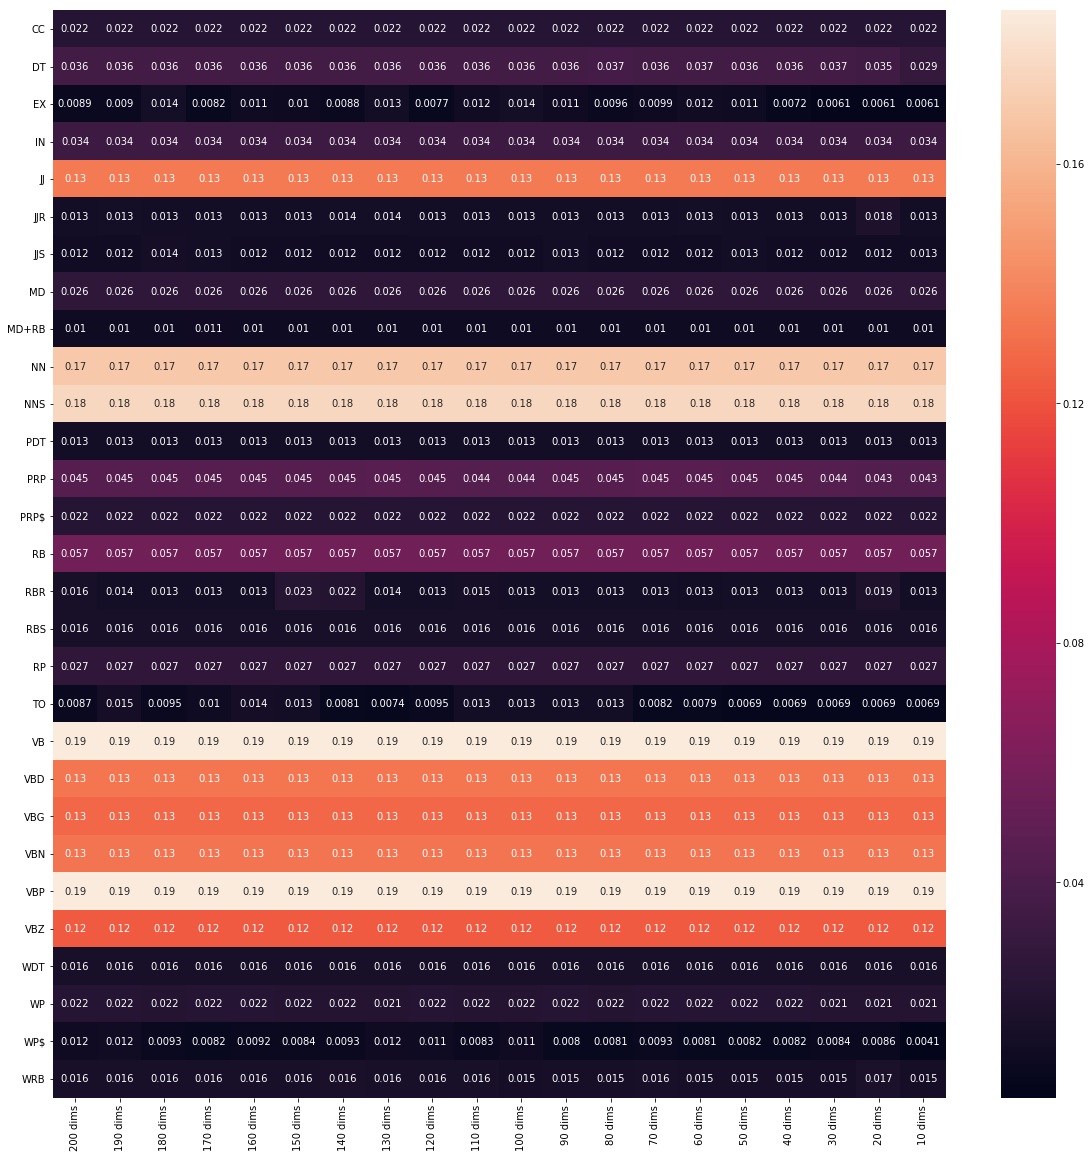

In [53]:
plt.figure(figsize = (20, 20))
sns.heatmap(corr_for_dims_df, annot=True)

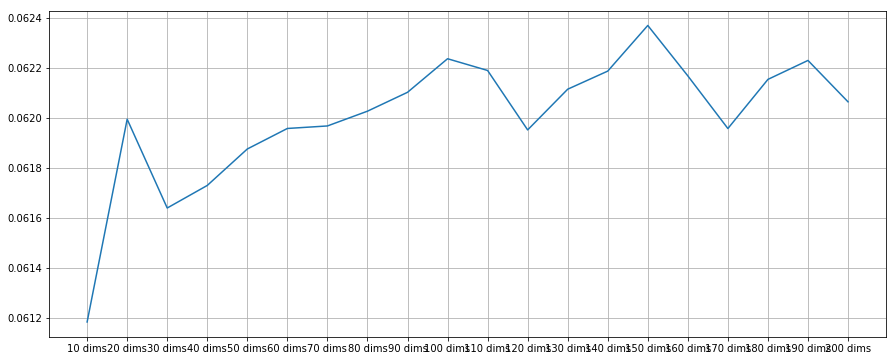

In [57]:
ax = plt.figure(figsize = (15, 6))
plt.xticks = corr_for_dims_df.index
corr_for_dims_df.mean()[::-1].plot(grid=True, xticks=range(len(corr_for_dims_df.mean().index)))

## Reduced correlations - reduced by Top variance

Attributes of 600dim words2bits space with top-n variance 

In [ ]:
from sklearn.decomposition import PCA


vec_range = list(range(200, 0, -10))
print(vec_range)
corr_for_dims_df = pd.DataFrame()
for i, vec_dim_i in enumerate(vec_range):
    print(vec_dim_i)
    vecs_reduced = vecs_df[list(range(1, vec_length+1))]
    vecs_reduced = vecs_reduced[vecs_reduced.var(axis=0).sort_values(ascending=False)[:vec_dim_i].index]
    vecs_reduced = pd.DataFrame(vecs_reduced, columns=range(vecs_reduced.shape[1]), index=vecs_df.index)
    vecs_reduced = vecs_reduced.dropna(axis=1)
    export_vecs_for_eval(vecs_reduced, fname="vecs_var_%s_to_%s.nonbin" % (vec_length, vec_dim_i))
    for tag in all_tags:
        vecs_reduced[tag] = [1 if tag in tags_for_word(word) else 0 for word in vecs_reduced.index]

    
    corr_df = vecs_reduced.corr()[list(all_tags)].loc[range(vec_dim_i)]
    corr_df = corr_df.sort_index(axis=1)
    
    corr_for_dims_df["%s dims" % vec_range[i]] = corr_df.max(axis=0)

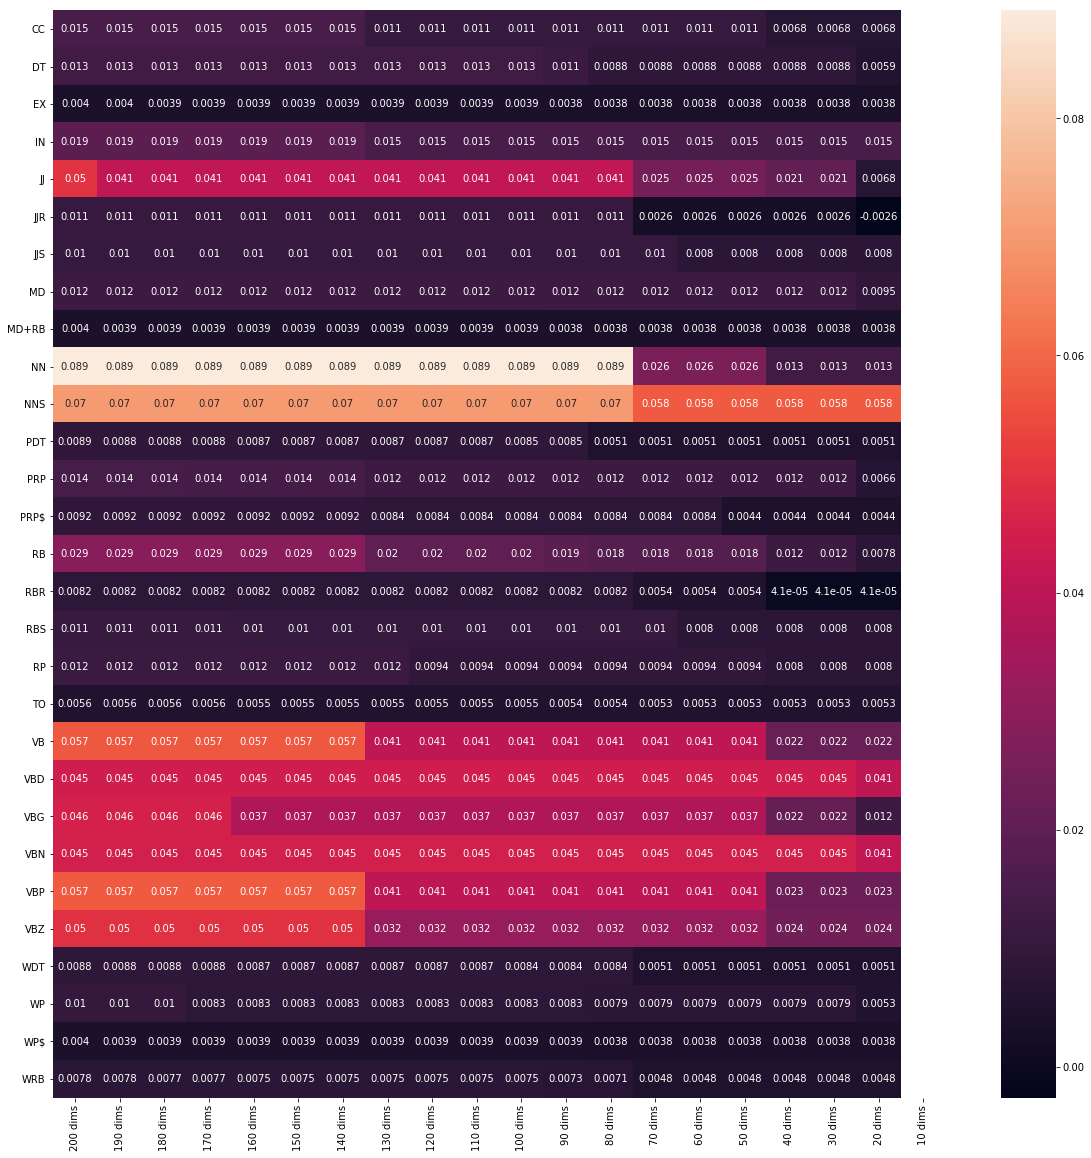

In [68]:
# selection of min covariance

plt.figure(figsize = (20, 20))
sns.heatmap(corr_for_dims_df, annot=True)

In [ ]:
ax = plt.figure(figsize = (15, 6))
plt.xticks = corr_for_dims_df.index
corr_for_dims_df.mean()[::-1].plot(grid=True, xticks=range(len(corr_for_dims_df.mean().index)))

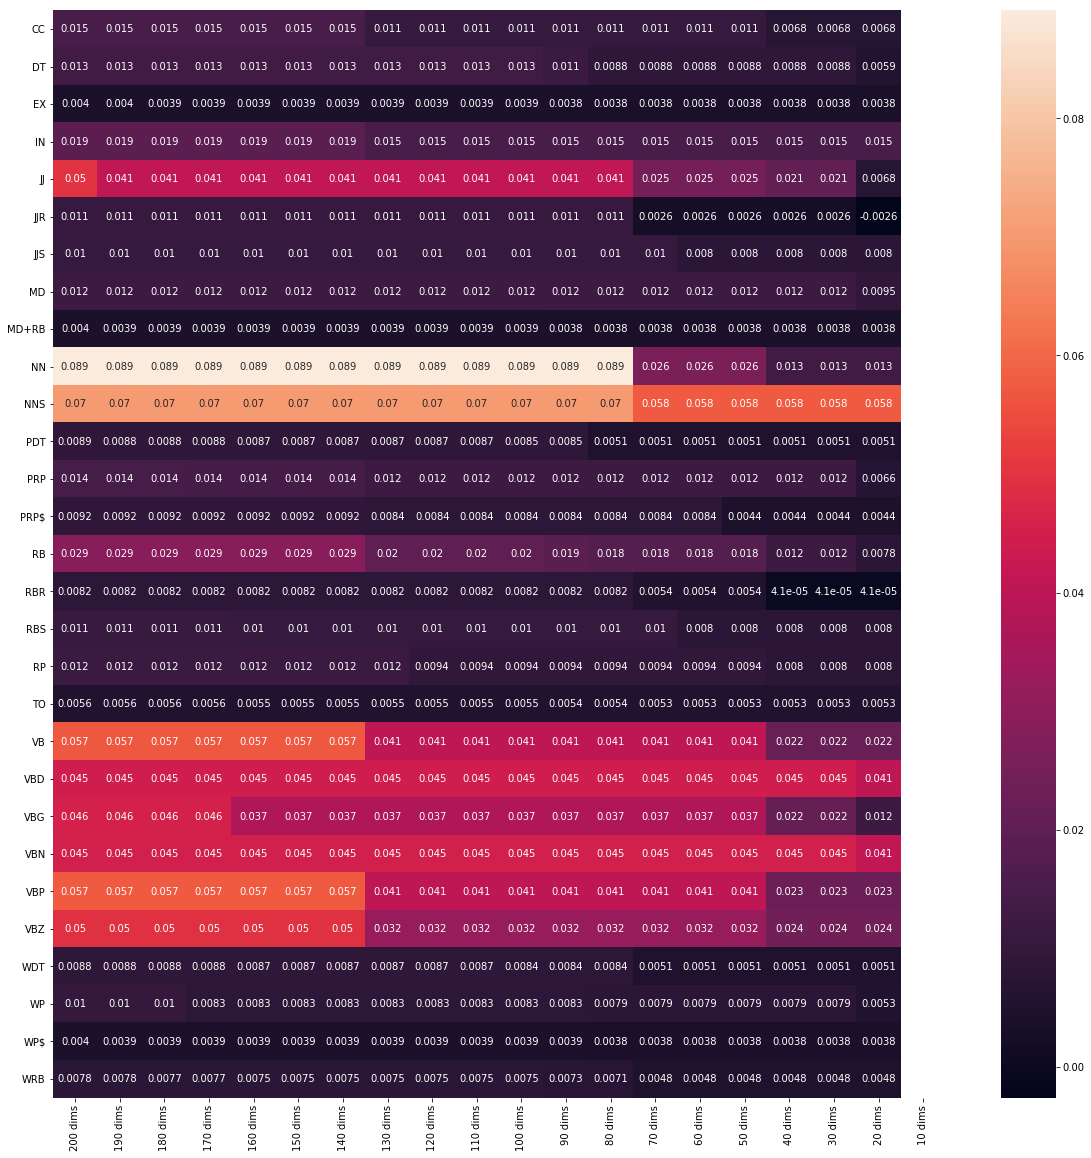

In [68]:
# selection of max covariance

plt.figure(figsize = (20, 20))
sns.heatmap(corr_for_dims_df, annot=True)

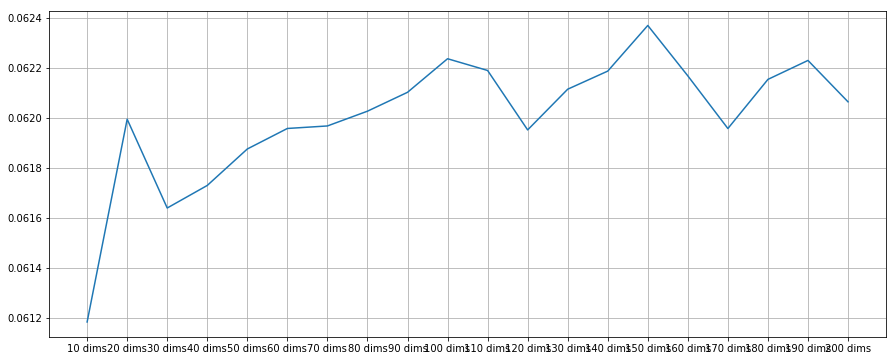

In [57]:
ax = plt.figure(figsize = (15, 6))
plt.xticks = corr_for_dims_df.index
corr_for_dims_df.mean()[::-1].plot(grid=True, xticks=range(len(corr_for_dims_df.mean().index)))

## Original (non-reduced) correlations

Original vectors directly trained into target dimensionality and its correlations to PoS attributes 

In [ ]:
epochs = 10

vec_range = list(range(10, 110, 10)) + list(range(150, 1500, 100))
vec_files = ["../vectors/1b%sd_vectors_e%s_nonbin" % (vec_len, epochs) for vec_len in vec_range]
corr_for_dims_df = pd.DataFrame()
for vec_dim_i in range(len(vec_range)):
        corr_for_dims_df[vec_range[vec_dim_i]] = top_corr_for_vecfile(vec_files[vec_dim_i])
    
corr_for_dims_df.sort_index(inplace=True, axis=1)

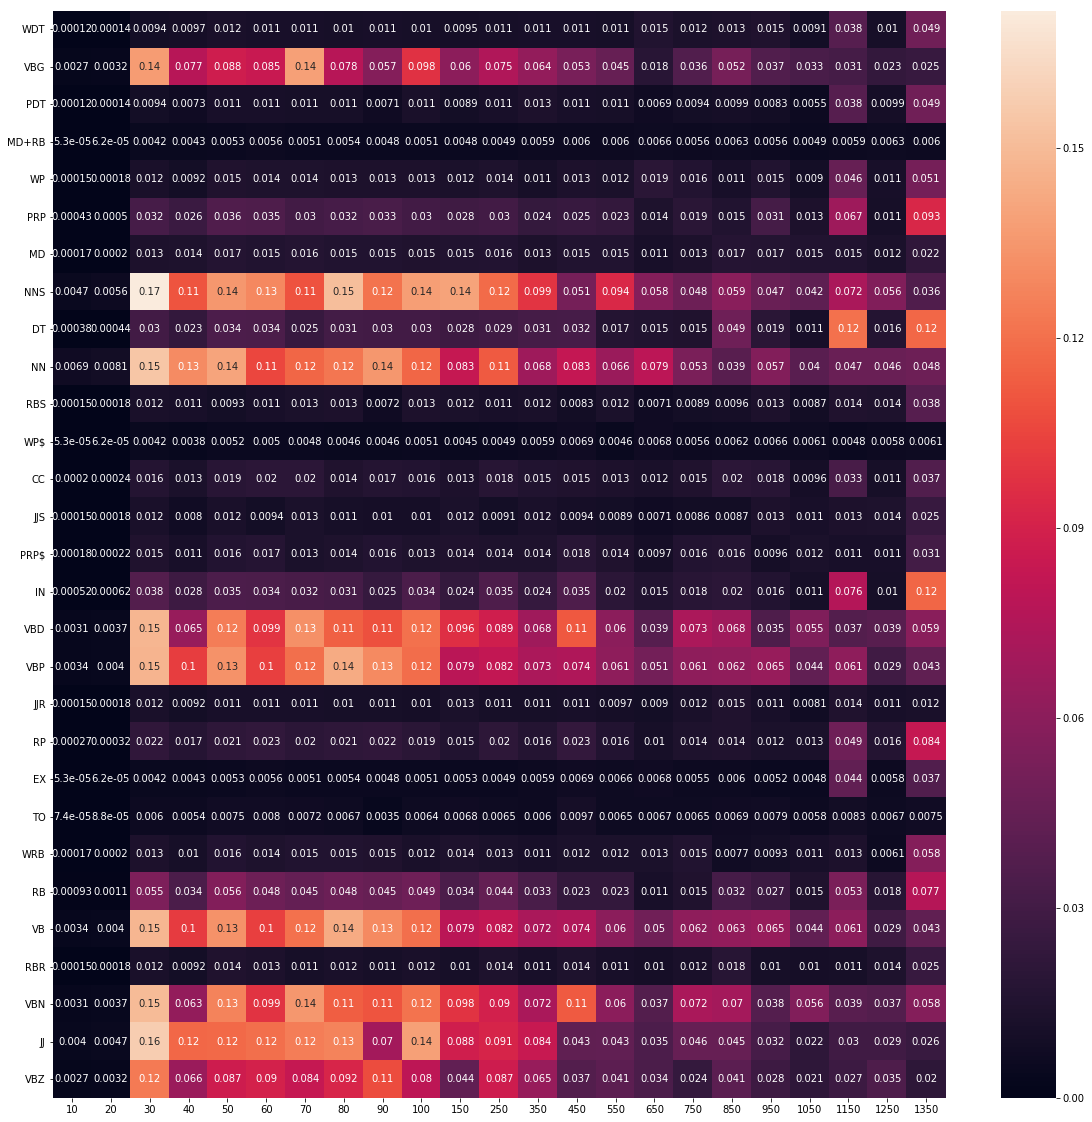

In [17]:
plt.figure(figsize = (20, 20))
sns.heatmap(corr_for_dims_df, annot=True)

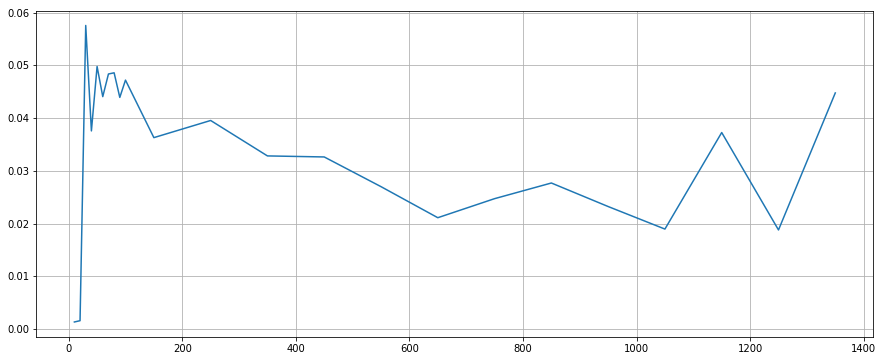

In [19]:
ax = plt.figure(figsize = (15, 6))
plt.xticks = corr_for_dims_df.index
corr_for_dims_df.mean().plot(grid=True)